In [105]:
from factor_tools_v4 import *

In [106]:
industry_index_code = '801030'
bank = '801780'
other = '801790'

In [107]:
industry_index_code = '801030'

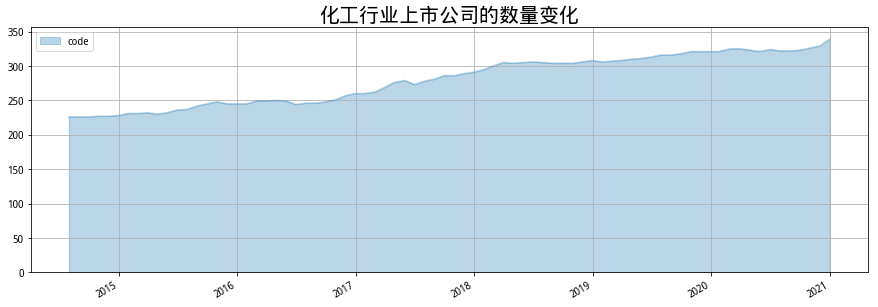

In [108]:
start_date = '2014-07-01'
end_date = '2020-12-31'

trade_month_list = get_period_date('M', start_date, end_date)

dy_chem_df = get_dynamic_univ(trade_month_list, industry_index_code)
dy_chem_count = dy_chem_df.groupby(level='date').count()


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

dy_chem_count.index = [datetime.strptime(dt, "%Y-%m-%d") for dt in dy_chem_count.index]
dy_chem_count[['code']].plot(kind='area', alpha=0.3, ax=ax)
ax.set_title('化工行业上市公司的数量变化', fontsize = 20)
ax.grid(True)

In [109]:
dy_chem_count.head(1).append(dy_chem_count.tail(1))

,code
2014-07-31,226
2020-12-31,339


In [110]:
factor_pools = get_processed_cum_factor(trade_month_list, industry_index_code)
univ = []
for date in trade_month_list:
    temp = get_index_univ(industry_index_code, date)
    univ = list(set(univ + temp))

forward_return = get_forward_return(univ, trade_month_list, n=1)
forward_return = forward_return.pivot(index='date', columns='code', values='forward_return')

DEGM = factor_pools.pivot(index='date', columns='code', values='DEGM')
non_linear_size = factor_pools.pivot(index='date', columns='code', values='non_linear_size')
cfo_to_ev = factor_pools.pivot(index='date', columns='code', values='cfo_to_ev')
residual_volatility = factor_pools.pivot(index='date', columns='code', values='residual_volatility')
Skewness60 = factor_pools.pivot(index='date', columns='code', values='Skewness60')
VOL60 = factor_pools.pivot(index='date', columns='code', values='VOL60')
roe_ttm = factor_pools.pivot(index='date', columns='code', values='roe_ttm')
VOL20 = factor_pools.pivot(index='date', columns='code', values='VOL20')
Skewness20 = factor_pools.pivot(index='date', columns='code', values='Skewness20')
gross_income_ratio = factor_pools.pivot(index='date', columns='code', values='gross_income_ratio')
pe_ratio = factor_pools.pivot(index='date', columns='code', values='pe_ratio')
pb_ratio = factor_pools.pivot(index='date', columns='code', values='pb_ratio')
inc_revenue_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_revenue_year_on_year')
inc_net_profit_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_net_profit_year_on_year')
inc_operation_profit_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_operation_profit_year_on_year')
development_ratio = factor_pools.pivot(index='date', columns='code', values='development_ratio')
sale_expense_to_operating_revenue = factor_pools.pivot(index='date', columns='code', values='sale_expense_to_operating_revenue')
max_turnover = factor_pools.pivot(index='date', columns='code', values='max_turnover')
RCGO = factor_pools.pivot(index='date', columns='code', values='RCGO')


In [111]:
fac_dict = {'经营活动产生的现金流量净额与企业价值之比TTM':cfo_to_ev,
                     '残差波动率':residual_volatility, 
                     '个股收益的60日偏度':Skewness60, 
                     '权益回报率TTM':roe_ttm,
                     '个股收益的20日偏度':Skewness20, 
                     '销售毛利率':gross_income_ratio, 
                     '市盈率（TTM）':pe_ratio, 
                     '市净率（TTM）':pb_ratio,
                     '单季度营业收入增长率（同比）':inc_revenue_year_on_year, 
                     '单季度净利润增长率（同比）':inc_net_profit_year_on_year,
                     '单季度营业利润增长率（同比）':inc_operation_profit_year_on_year,
                     '营业费用与营业总收入之比':sale_expense_to_operating_revenue,
                     'PNN':PNN,
                     'NNN':NNN,
                     '残差未实现收益':RCGO,
                     '60日平均换手率':Turnover60
                    }

fac_dict2 = {'非线性市值':non_linear_size, 
                     '经营活动产生的现金流量净额与企业价值之比TTM':cfo_to_ev,
                     '残差波动率':residual_volatility, 
                     '个股收益的60日偏度':Skewness60, 
                     '权益回报率TTM':roe_ttm,
                     '个股收益的20日偏度':Skewness20, 
                     '销售毛利率':gross_income_ratio, 
                     '市盈率（TTM）':pe_ratio, 
                     '市净率（TTM）':pb_ratio,
                     '单季度营业收入增长率（同比）':inc_revenue_year_on_year, 
                     '单季度净利润增长率（同比）':inc_net_profit_year_on_year,
                     '单季度营业利润增长率（同比）':inc_operation_profit_year_on_year, 
                     '营业费用与营业总收入之比':sale_expense_to_operating_revenue,
                    }
factor_report(fac_dict, forward_return, -1, 3, 'monthly')

,IC,IC_IR,正显著率,负显著率,多空组合年化收益率,多空组合年化波动率,多空组合夏普比率,多空组合最大回撤
非线性市值,5.49%,0.5,31.17%,6.49%,21.39%,11.47%,1.76,-10.47%
经营活动产生的现金流量净额与企业价值之比TTM,3.48%,0.38,22.08%,1.3%,7.97%,9.77%,0.84,-14.71%
残差波动率,8.25%,0.5,40.26%,14.29%,14.91%,15.54%,0.98,-27.77%
个股收益的60日偏度,3.89%,0.42,15.58%,5.19%,9.12%,8.82%,1.04,-16.18%
权益回报率TTM,2.67%,0.25,20.78%,9.09%,10.48%,11.48%,0.93,-8.92%
个股收益的20日偏度,2.9%,0.28,16.88%,3.9%,4.2%,9.32%,0.49,-14.17%
销售毛利率,1.94%,0.15,19.48%,15.58%,7.29%,10.92%,0.7,-13.36%
市盈率（TTM）,5.67%,0.59,23.38%,2.6%,17.34%,9.98%,1.66,-8.39%
市净率（TTM）,5.31%,0.36,31.17%,14.29%,11.11%,12.93%,0.88,-27.67%
单季度营业收入增长率（同比）,2.94%,0.29,20.78%,7.79%,11.6%,10.19%,1.13,-8.03%


,strategy,benchmark
年化收益率,17.89%,8.13%
年化标准差,24.39%,26.09%
贝塔,0.91,1
夏普比率,0.73,0.31
信息比率,1.67,0
最大回撤,36.10%,47.27%


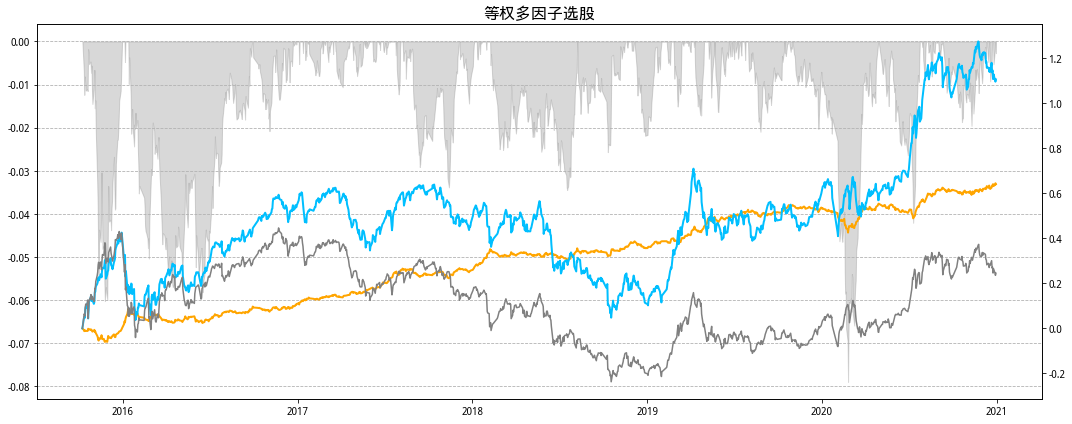

In [112]:
start_date = '2015-07-01'
eq_factor = equal_weight(fac_dict)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )
NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='等权多因子选股')
NA.cal_indicators()

,strategy,benchmark
年化收益率,16.62%,8.13%
年化标准差,25.89%,26.09%
贝塔,0.97,1
夏普比率,0.64,0.31
信息比率,1.6,0
最大回撤,34.13%,47.27%


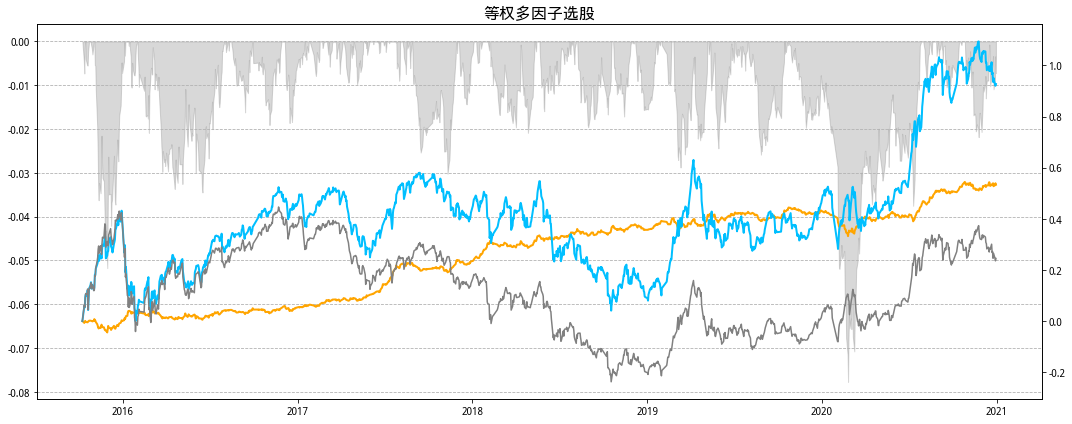

In [113]:
start_date = '2015-07-01'
eq_factor = equal_weight(fac_dict2)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )
NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='等权多因子选股')
NA.cal_indicators()

In [114]:
NA.win_prob()

,win_prob
日度,53.64%
周度,60.0%
月度,61.29%
年度,100.0%


,strategy,benchmark,hedging
year,,,
2015,30.97,30.29,0.68
2016,14.69,8.58,6.11
2017,-1.48,-15.80,14.31
2018,-24.95,-31.65,6.70
2019,36.15,29.09,7.05
2020-12-30,29.98,20.86,9.12


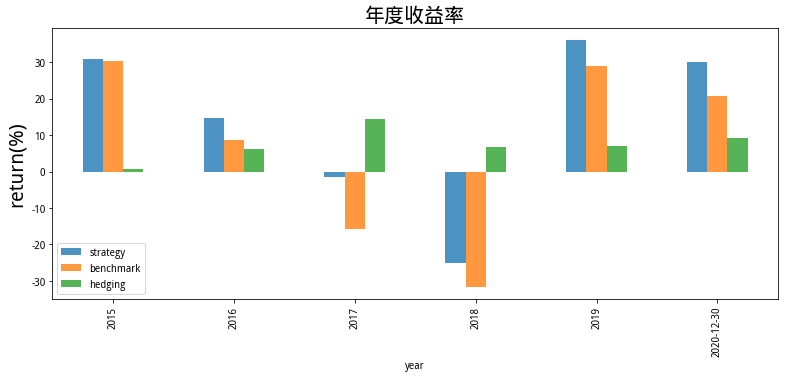

In [115]:
NA.plot_ret()

In [116]:
start_date = '2015-07-01'
monthly_return = get_monthly_return(univ, trade_month_list)
chem_factor, chem_weight = ICIR_weight(fac_dict, monthly_return, 12)
chem_factor2, chem_weight2 = ICIR_weight(fac_dict2, monthly_return, 12)

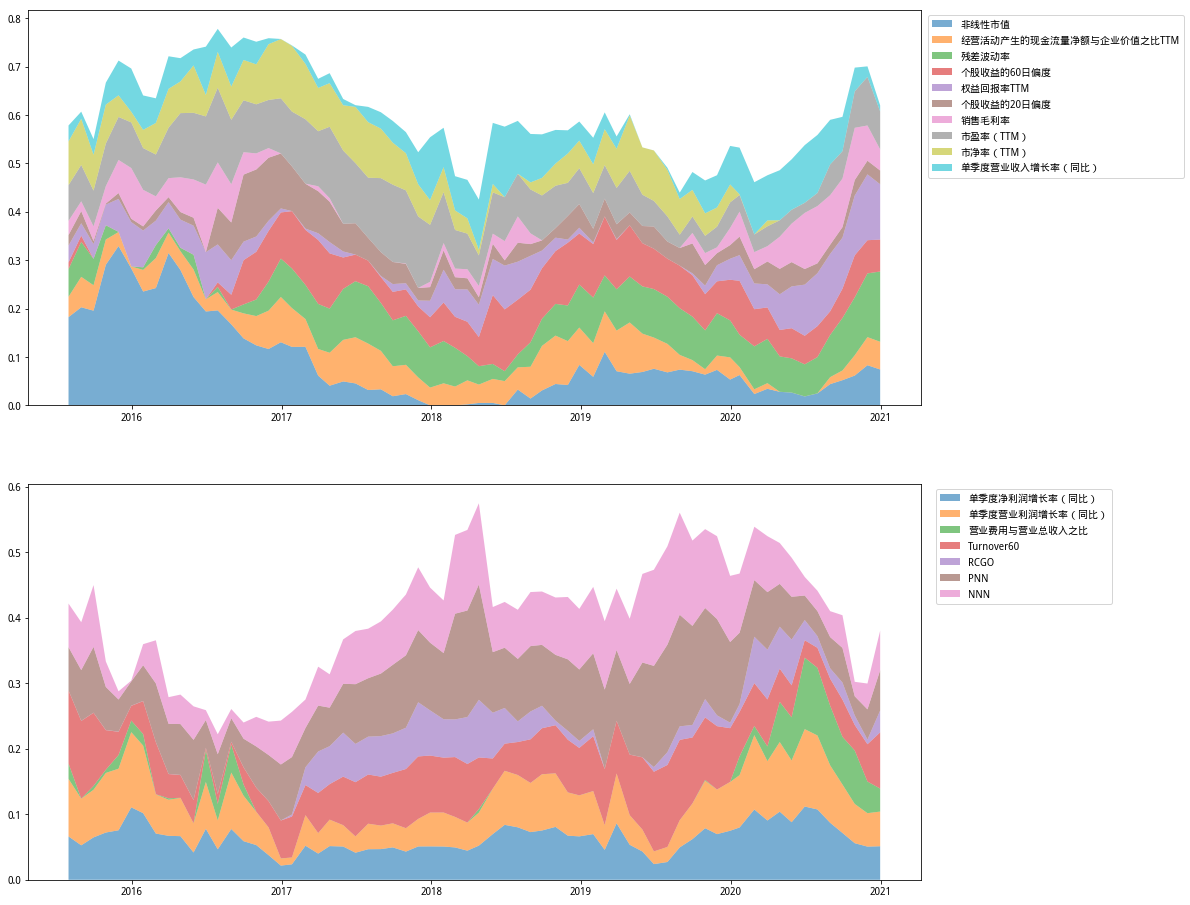

In [117]:
temp_weight = chem_weight.copy()

temp_weight.index = pd.to_datetime(temp_weight.index)
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#ax.set_ylim([0,1])

temp_weight1 = temp_weight[temp_weight.columns[:10]]
ax.stackplot(temp_weight1.index, temp_weight1.values.T, alpha=0.6, labels=temp_weight1.columns.tolist())
ax.legend(bbox_to_anchor=(1.3, 1.0))
temp_weight2 = temp_weight[temp_weight.columns[10:]]
ax2.stackplot(temp_weight2.index, temp_weight2.values.T, alpha=0.6, labels=temp_weight2.columns.tolist())
ax2.legend(bbox_to_anchor=(1.22, 1.0))

,strategy,benchmark
年化收益率,16.44%,8.13%
年化标准差,25.11%,26.09%
贝塔,0.94,1
夏普比率,0.65,0.31
信息比率,1.55,0
最大回撤,34.85%,47.27%


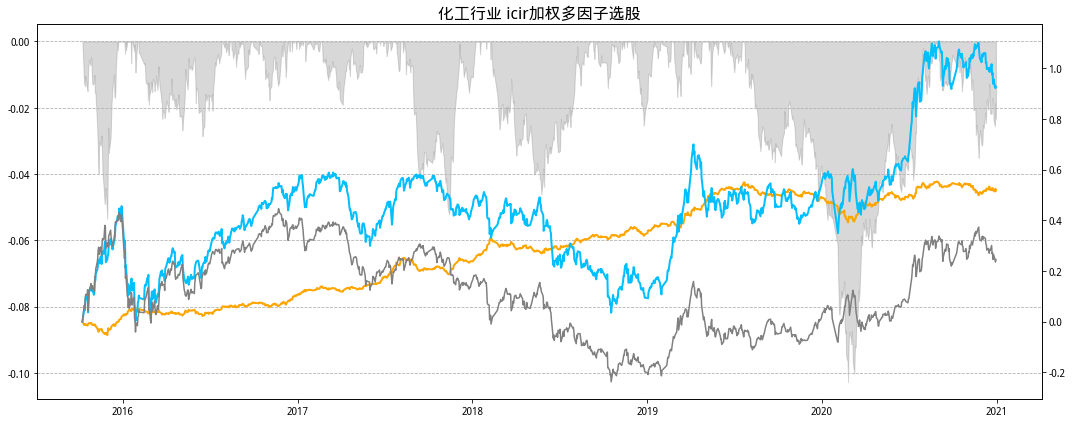

In [118]:
start_date = '2015-07-01'
nav_df = easy_backtest(chem_factor, 
                       chem_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns=daily_returns,
                        group=5, 
                    )

NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='化工行业 icir加权多因子选股')
NA.cal_indicators()

In [135]:
industry_index_code = '801760'

In [136]:
univ = []
for date in trade_month_list:
    temp = get_index_univ(industry_index_code, date)
    univ = list(set(univ + temp))

forward_return = get_forward_return(univ, trade_month_list, n=1)
forward_return = forward_return.pivot(index='date', columns='code', values='forward_return')
fac_dict = {'forward_return':forward_return
    
}

In [137]:
eq_factor = equal_weight(fac_dict)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )

ValueError: Bin edges must be unique: array([-0.48430735930735935, -0.07073571362231157, 0.0, 0.0,
       0.16040767321791935, 0.7127659574468088]).
You can drop duplicate edges by setting the 'duplicates' kwarg

,strategy,benchmark
年化收益率,21.43%,7.77%
年化标准差,28.38%,30.40%
贝塔,0.91,1
夏普比率,0.76,0.26
信息比率,2.07,0
最大回撤,44.34%,57.51%


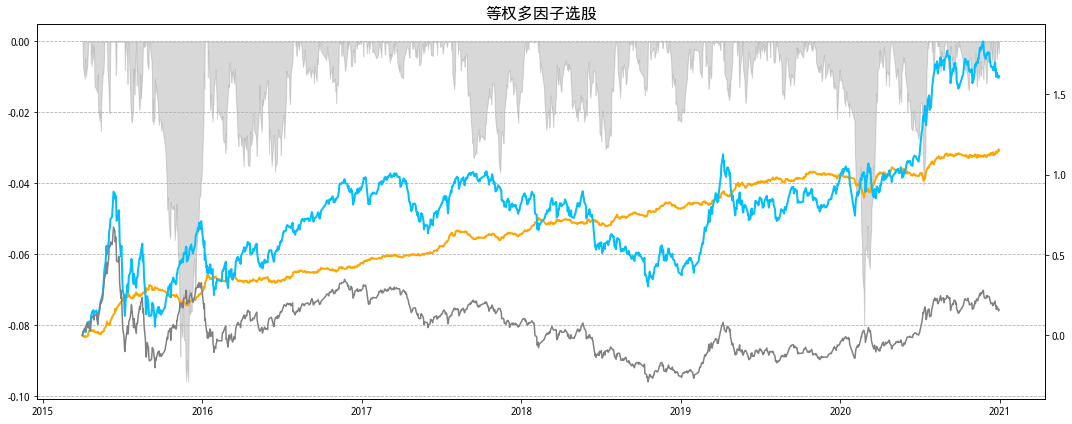

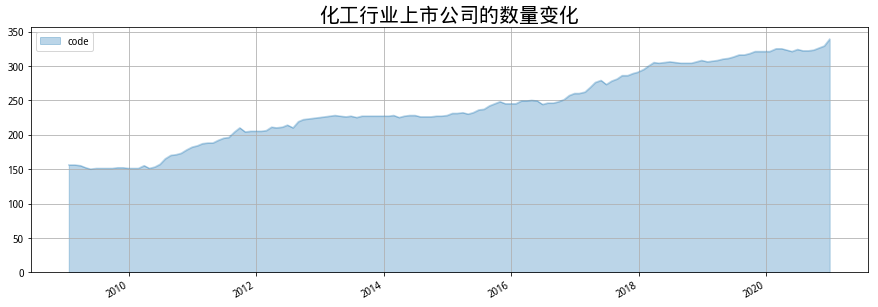

In [119]:
from factor_tools_v4 import *
industry_index_code = '801030'
start_date = '2009-01-01'
end_date = '2020-12-31'

trade_month_list = get_period_date('M', start_date, end_date)

dy_chem_df = get_dynamic_univ(trade_month_list, industry_index_code)
dy_chem_count = dy_chem_df.groupby(level='date').count()


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

dy_chem_count.index = [datetime.strptime(dt, "%Y-%m-%d") for dt in dy_chem_count.index]
dy_chem_count[['code']].plot(kind='area', alpha=0.3, ax=ax)
ax.set_title('化工行业上市公司的数量变化', fontsize = 20)
ax.grid(True)

In [120]:
factor_pools = get_processed_cum_factor(trade_month_list, industry_index_code)
univ = []
for date in trade_month_list:
    temp = get_index_univ(industry_index_code, date)
    univ = list(set(univ + temp))

forward_return = get_forward_return(univ, trade_month_list, n=1)
forward_return = forward_return.pivot(index='date', columns='code', values='forward_return')

DEGM = factor_pools.pivot(index='date', columns='code', values='DEGM')
non_linear_size = factor_pools.pivot(index='date', columns='code', values='non_linear_size')
cfo_to_ev = factor_pools.pivot(index='date', columns='code', values='cfo_to_ev')
residual_volatility = factor_pools.pivot(index='date', columns='code', values='residual_volatility')
Skewness60 = factor_pools.pivot(index='date', columns='code', values='Skewness60')
VOL60 = factor_pools.pivot(index='date', columns='code', values='VOL60')
roe_ttm = factor_pools.pivot(index='date', columns='code', values='roe_ttm')
VOL20 = factor_pools.pivot(index='date', columns='code', values='VOL20')
Skewness20 = factor_pools.pivot(index='date', columns='code', values='Skewness20')
gross_income_ratio = factor_pools.pivot(index='date', columns='code', values='gross_income_ratio')
pe_ratio = factor_pools.pivot(index='date', columns='code', values='pe_ratio')
pb_ratio = factor_pools.pivot(index='date', columns='code', values='pb_ratio')
inc_revenue_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_revenue_year_on_year')
inc_net_profit_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_net_profit_year_on_year')
inc_operation_profit_year_on_year = factor_pools.pivot(index='date', columns='code', values='inc_operation_profit_year_on_year')
development_ratio = factor_pools.pivot(index='date', columns='code', values='development_ratio')
sale_expense_to_operating_revenue = factor_pools.pivot(index='date', columns='code', values='sale_expense_to_operating_revenue')
max_turnover = factor_pools.pivot(index='date', columns='code', values='max_turnover')
RCGO = factor_pools.pivot(index='date', columns='code', values='RCGO')


In [127]:
fac_dict = {'经营活动产生的现金流量净额与企业价值之比TTM':cfo_to_ev,
                     '残差波动率':residual_volatility, 
                     '个股收益的60日偏度':Skewness60, 
                     '权益回报率TTM':roe_ttm,
                     '个股收益的20日偏度':Skewness20, 
                     '销售毛利率':gross_income_ratio, 
                     '市盈率（TTM）':pe_ratio, 
                     '市净率（TTM）':pb_ratio,
                     '单季度营业收入增长率（同比）':inc_revenue_year_on_year, 
                     '单季度净利润增长率（同比）':inc_net_profit_year_on_year,
                     '单季度营业利润增长率（同比）':inc_operation_profit_year_on_year,
                     '营业费用与营业总收入之比':sale_expense_to_operating_revenue,
                     'PNN':PNN,
                     'NNN':NNN,
                     '残差未实现收益':RCGO,
                     '60日平均换手率':Turnover60
                    }

fac_dict2 = {'非线性市值':non_linear_size, 
                     '经营活动产生的现金流量净额与企业价值之比TTM':cfo_to_ev,
                     '残差波动率':residual_volatility, 
                     '个股收益的60日偏度':Skewness60, 
                     '权益回报率TTM':roe_ttm,
                     '个股收益的20日偏度':Skewness20, 
                     '销售毛利率':gross_income_ratio, 
                     '市盈率（TTM）':pe_ratio, 
                     '市净率（TTM）':pb_ratio,
                     '单季度营业收入增长率（同比）':inc_revenue_year_on_year, 
                     '单季度净利润增长率（同比）':inc_net_profit_year_on_year,
                     '单季度营业利润增长率（同比）':inc_operation_profit_year_on_year, 
                     '营业费用与营业总收入之比':sale_expense_to_operating_revenue,
                    }
factor_report(fac_dict, forward_return, -1, 3, 'monthly')


,strategy,benchmark
年化收益率,23.32%,10.49%
年化标准差,26.34%,28.14%
贝塔,0.91,1
夏普比率,0.89,0.37
信息比率,2.09,0
最大回撤,43.27%,57.30%


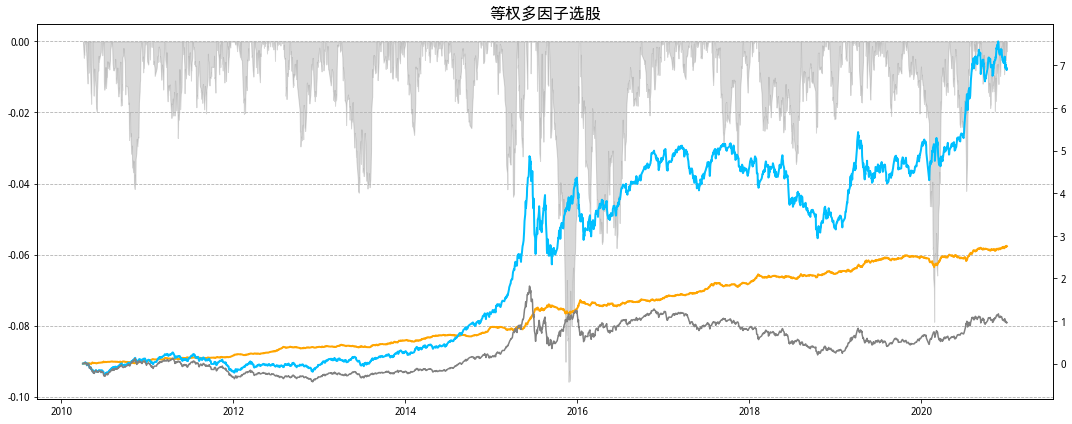

In [134]:
start_date = '2010-01-01'
eq_factor = equal_weight(fac_dict)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )
NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='等权多因子选股')
NA.cal_indicators()

,strategy,benchmark
年化收益率,21.50%,10.49%
年化标准差,28.32%,28.14%
贝塔,0.99,1
夏普比率,0.76,0.37
信息比率,1.9,0
最大回撤,47.05%,57.30%


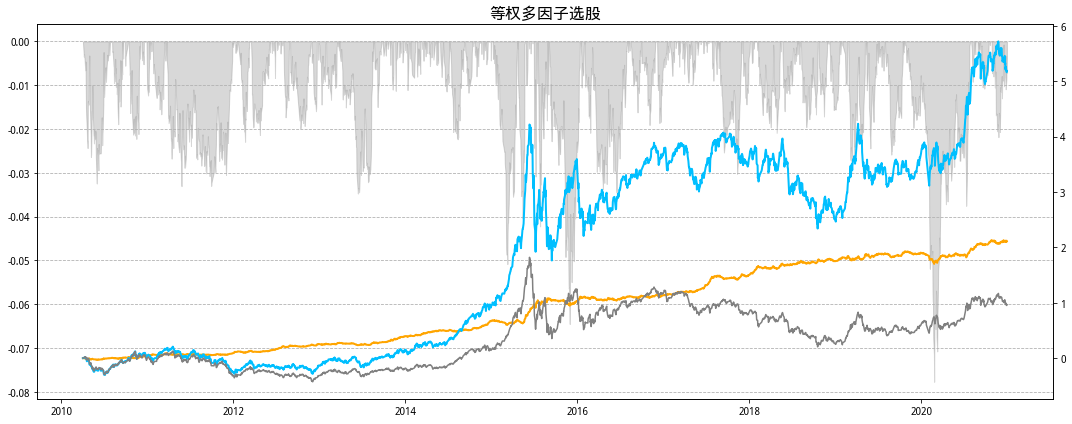

In [135]:
eq_factor = equal_weight(fac_dict2)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )
NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='等权多因子选股')
NA.cal_indicators()

In [124]:
start_date = '2010-01-01'
monthly_return = get_monthly_return(univ, trade_month_list)
chem_factor, chem_weight = ICIR_weight(fac_dict, monthly_return, 12)
chem_factor2, chem_weight2 = ICIR_weight(fac_dict2, monthly_return, 12)

,strategy,benchmark
年化收益率,23.73%,10.49%
年化标准差,26.98%,28.14%
贝塔,0.94,1
夏普比率,0.88,0.37
信息比率,2.22,0
最大回撤,44.54%,57.30%


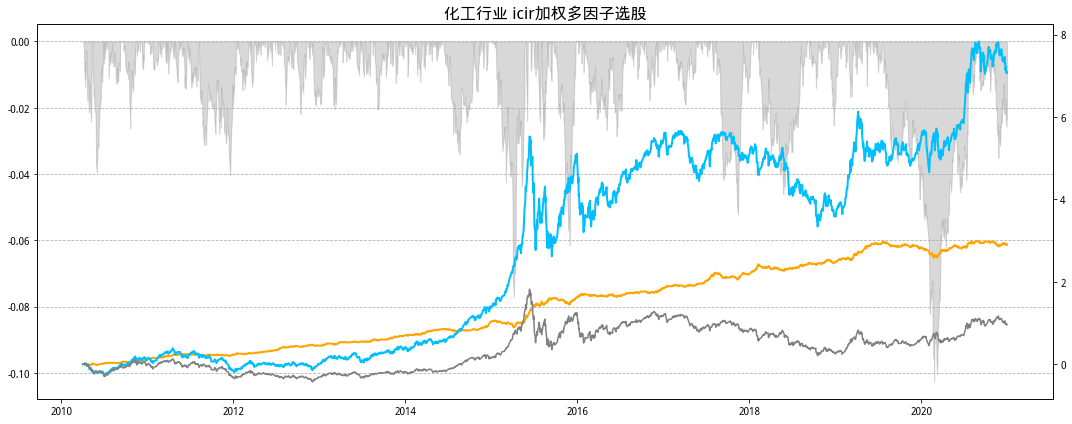

In [125]:
nav_df = easy_backtest(chem_factor, 
                       chem_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns=daily_returns,
                        group=5, 
                    )

NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='化工行业 icir加权多因子选股')
NA.cal_indicators()

,strategy,benchmark
年化收益率,23.17%,10.49%
年化标准差,29.13%,28.14%
贝塔,1.01,1
夏普比率,0.8,0.37
信息比率,2.09,0
最大回撤,47.27%,57.30%


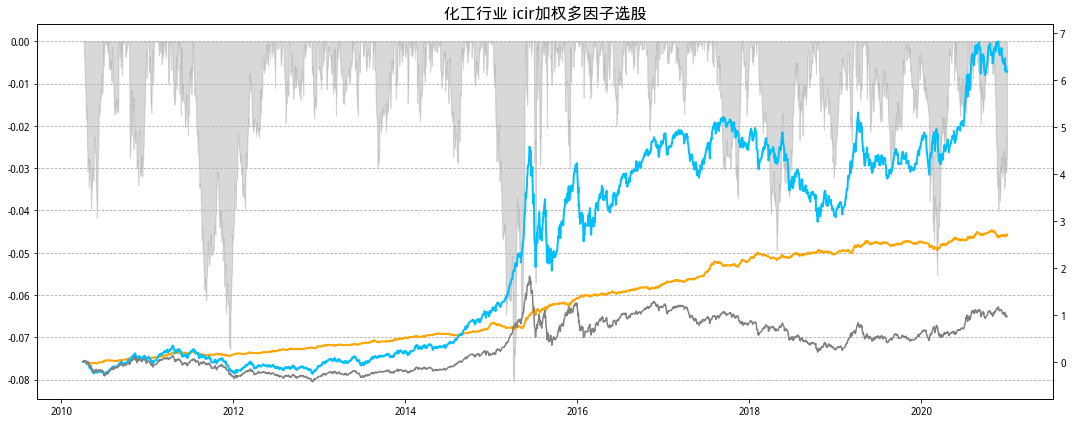

In [126]:
nav_df = easy_backtest(chem_factor2, 
                       chem_factor2,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns=daily_returns,
                        group=5, 
                    )

NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='化工行业 icir加权多因子选股')
NA.cal_indicators()

In [167]:
fac_dict = {'经营活动产生的现金流量净额与企业价值之比TTM':cfo_to_ev,
                     '残差波动率':residual_volatility, 
                     '个股收益的60日偏度':Skewness60, 
                     '权益回报率TTM':roe_ttm,
                     '个股收益的20日偏度':Skewness20, 
                     '销售毛利率':gross_income_ratio, 
                     '市盈率（TTM）':pe_ratio, 
                     '市净率（TTM）':pb_ratio,
                     '单季度营业收入增长率（同比）':inc_revenue_year_on_year, 
                     '单季度净利润增长率（同比）':inc_net_profit_year_on_year,
                     '单季度营业利润增长率（同比）':inc_operation_profit_year_on_year,
                     '营业费用与营业总收入之比':sale_expense_to_operating_revenue,
                     'PNN':PNN,
                     'NNN':NNN,
                     '残差未实现收益':RCGO,
                     '60日平均换手率':Turnover60
                    }

,strategy,benchmark
年化收益率,33.91%,10.49%
年化标准差,26.33%,28.14%
贝塔,0.91,1
夏普比率,1.29,0.37
信息比率,3.69,0
最大回撤,39.97%,57.30%


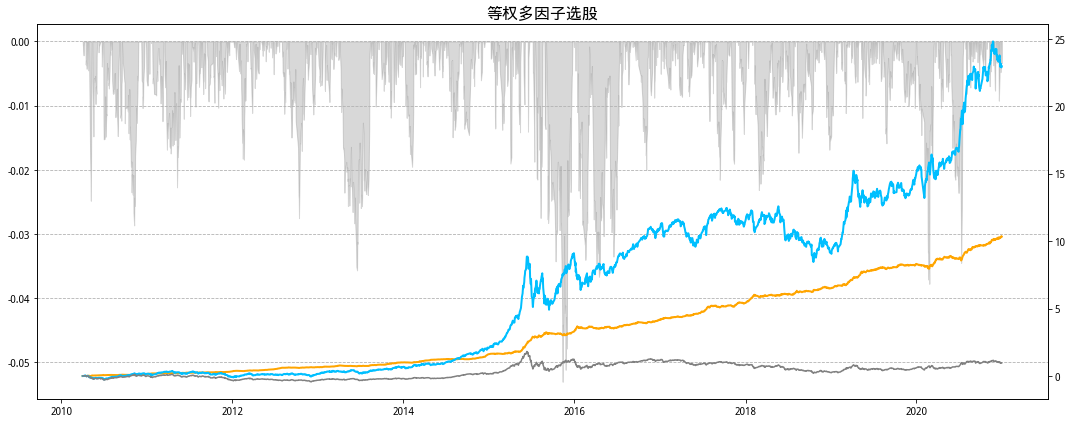

In [171]:
eq_factor = equal_weight(fac_dict3)
daily_returns = get_daily_return(univ, start_date, end_date)
daily_returns.index = pd.to_datetime(daily_returns.index)
nav_df = easy_backtest(eq_factor,
                       eq_factor,
                        start_date=start_date, 
                        end_date=end_date,
                        daily_returns = daily_returns,
                        group=5, 
                    )
NA = net_value_analysis(nav_excess_df=nav_df)
NA.plot_hedging(title='等权多因子选股')
NA.cal_indicators()

,strategy,benchmark,hedging
year,,,
2010,13.18,1.95,11.23
2011,-20.46,-33.68,13.21
2012,24.51,1.78,22.73
2013,35.51,19.54,15.97
2014,102.29,42.06,60.23
2015,192.90,73.03,119.88
2016,35.93,8.58,27.35
2017,-1.32,-15.80,14.47
2018,-20.19,-31.65,11.45


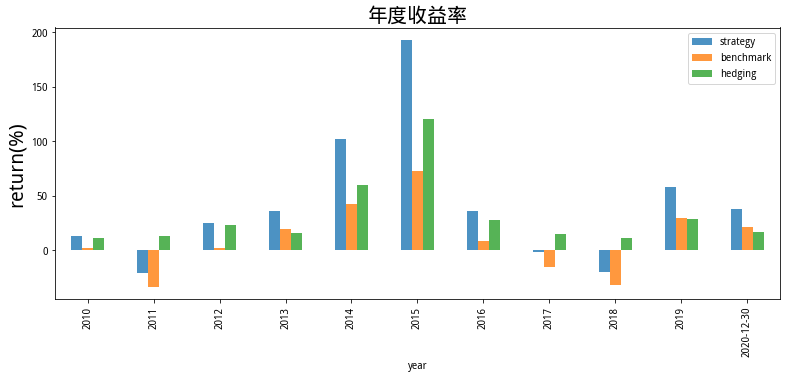

In [141]:
NA.plot_ret()

In [152]:
NA.win_prob()

,win_prob
日度,57.61%
周度,67.62%
月度,78.12%
年度,100.0%


In [162]:
def get_latest_position(file, last_date=True, date='2020-11-31', num=50):
    """
    获取某一期的持仓
    param：
        file：持仓文件
        last_date：日期是否最新
        date：持仓日期
        num：持股数目
    return：
        某一期的持仓
    """
    position = pd.read_csv(file, index_col='date')
    
    date = position.index[-1]
    position = position.loc[date].nlargest(num,'factor')
    
    return position

In [185]:
def get_positions(factor, start_date, end_date, group=5, freq='M'):
    """
    获取持仓
    params：
        factor：dataframe，index为date，columns为code，values为因子值
        start_date：开始时间
        end_date：结束时间
        group：第几组作为持仓组合
        freq：调仓频率，默认月频，根据因子频率来设定
    return：
        nav_df：策略和基准的净值数据
    """
    rebalance_dates = get_period_date(freq, start_date, end_date)
    rebalance_dates = [datetime.strptime(dt, '%Y-%m-%d') for dt in rebalance_dates]
    factor.index = pd.to_datetime(factor.index)
    factor = factor.stack().dropna()
    factor.name = 'factor'
    
    quantile_groups = bucketize_by_quantile(factor, group)
    portfolio_weights = get_portfolios_from_quantile_groups(quantile_groups, 1)
    
    cum_list = []
    for start in rebalance_dates:
        weights = portfolio_weights[start]
        dat = [start]*len(weights)
        weights = pd.DataFrame(weights)
        weights['date'] = dat
        weights = weights.reset_index()
        weights.columns = ['code', 'factor', 'date']
        cum_list.append(weights)
        
    cum_df = pd.concat(cum_list)
    cum_df = cum_df.reset_index().drop(['index'], axis=1)
    
    factors = []
    names = []
    
    for dat, cod in zip(cum_df.date, cum_df.code):
        factors.append(factor.loc[dat, cod])
        name = get_all_securities(date=dat)[['display_name']]
        names.append(name.display_name[cod])
    cum_df.factor = factors
    cum_df['name'] = names
    
    cum_df = cum_df.set_index(['date', 'code'])
    return cum_df

In [186]:
eq_factor = equal_weight(fac_dict3)

In [187]:
all_position = get_positions(eq_factor, start_date, '2020-11-30', group=5, freq='M')
file = 'eq_chem_monthly1.csv'
all_position.to_csv(file)